| <p style="text-align: left;">Name</p>               | Matr.Nr. |  |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Saranbayar MUNKHTUR</p> | 01558109 |                          |

**Prerequisites**. As usual, in order to succesfully carry out the following exercises, a series of python packages and the utils file for this unit <code>u6_utils.py</code> must be imported.

In [1]:
# import packages

import u6_utils as u6
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from types import SimpleNamespace

# Set plotting style of seaborn related plots.
sns.set(style="darkgrid", palette="deep")

# Exercise 1

Similar to the Sobel filter presented in the lecture, apply two other operators (Prewitt and Scharr) to an image for the <i>horizontal</i> and the <i>vertical</i> approximations of the derivatives of the <i>image intensity function</i>. Perfom following tasks:

- Load a picture of Charlie (<code>charlie_3.jpg</code>) and convert it to grayscale.
- Define the <i>horizontal and vertical Prewitt operator</i> as <i>numpy</i> arrays:

\begin{equation}P_x = \left( 
    \begin{array}{rrr}                                
        1 & 0 & -1 \\
        1 & 0 & -1 \\
        1 & 0 & -1 \\
    \end{array}\right)
\end{equation}

\begin{equation}P_y = \left( 
    \begin{array}{rrr}                                
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1 \\
    \end{array}\right)
\end{equation}

- Apply the <i>horizontal and vertical Prewitt</i> operator to the <i>grayscale</i> version of <i>Charlie</i> and plot the result.
- Define the <i>horizontal and vertical Scharr operator</i> as <i>numpy</i> arrays:

\begin{equation}S_x = \left( 
    \begin{array}{rrr}                                
        47 & 0 & -47 \\
        162 & 0 & -162 \\
        47 & 0 & -47 \\
    \end{array}\right)
\end{equation}

\begin{equation}S_y = \left( 
    \begin{array}{rrr}                                
        47 & 162 & 47 \\
        0 & 0 & 0 \\
        -47 & -162 & -47 \\
    \end{array}\right)
\end{equation}
- Apply the <i>horizontal and vertical Scharr</i> operator to the <i>grayscale</i> version of <i>Charlie</i> and plot the result.

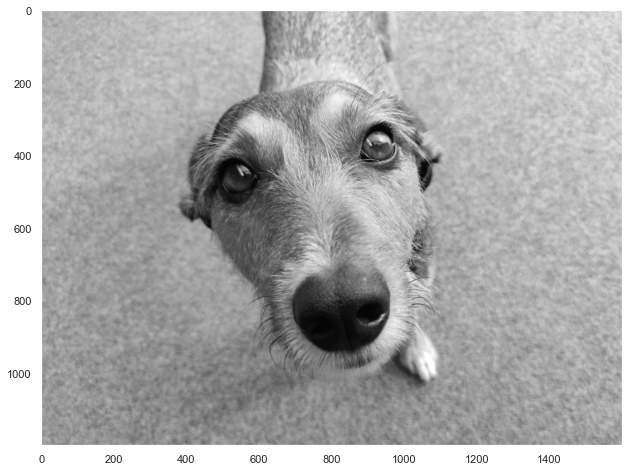

In [2]:
# load image and convert it to grayscale
image = mpimg.imread('resources/charlie_3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
u6.show_image(gray, cmap='gray')

In [3]:
# define the horizontal and the vertical prewitt operator
p_x= np.array([[  1, 0, -1], 
               [  1, 0, -1], 
               [  1, 0, -1]]) 

p_y= np.array([[  1, 1, 1], 
               [  0, 0, 0], 
               [ -1, -1, -1]]) 

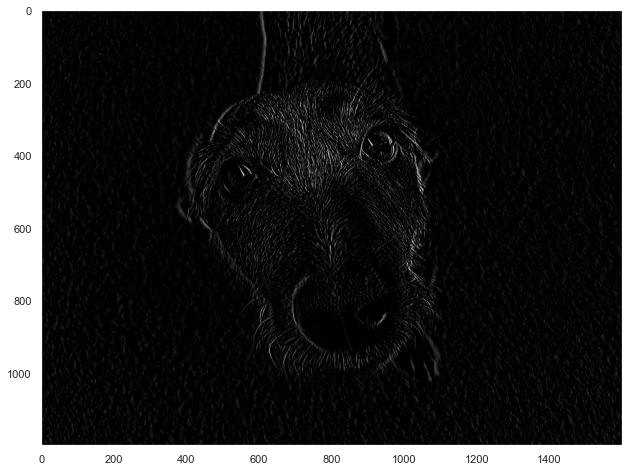

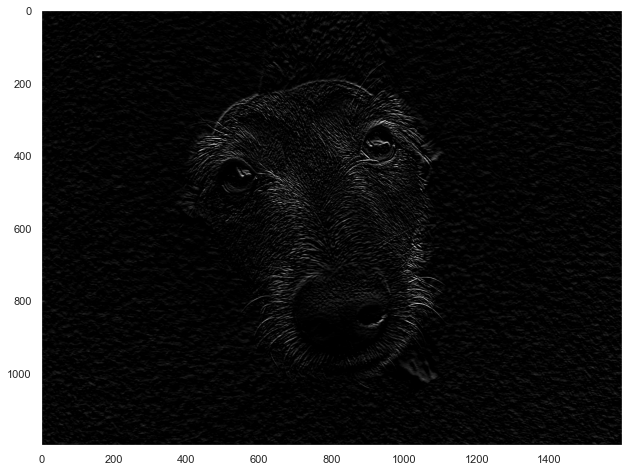

In [4]:
# apply the horizontal prewitt operator and plot the result 
filtered_image_x = cv2.filter2D(gray, -1, p_x)
filtered_image_y = cv2.filter2D(gray, -1, p_y)

# apply the vertical prewitt operator and plot the result 
u6.show_image(filtered_image_x, cmap='gray')
u6.show_image(filtered_image_y, cmap='gray')

In [5]:
# define the horizontal and the vertical scharr operator
s_x= np.array([[ 47, 0, -47], 
                [ 162, 0, -162], 
                [ 47, 0, -47]]) 

s_y= np.array([[ 47, 162,-47], 
               [ 0, 0, 0], 
               [ -47, -162, -47]]) 

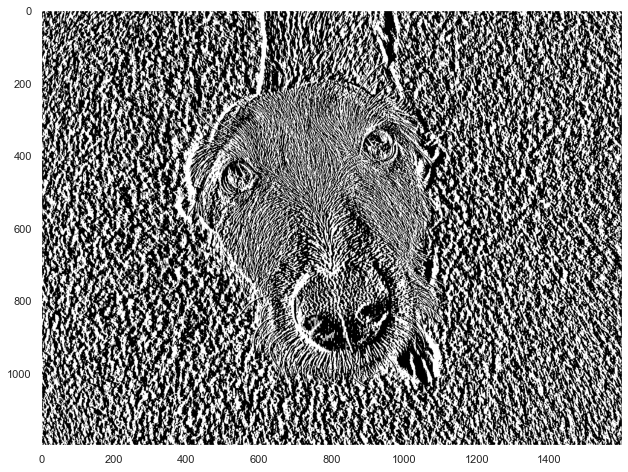

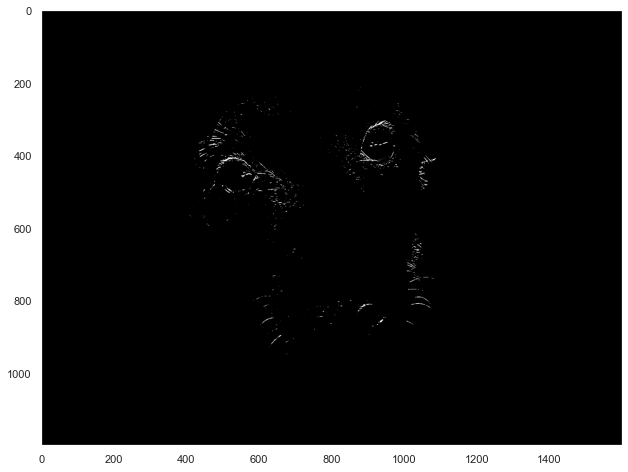

In [6]:
# apply the horizontal scharr operator and plot the result 
filtered_image_x = cv2.filter2D(gray, -1, s_x)
filtered_image_y = cv2.filter2D(gray, -1, s_y)


# apply the vertical scharr operator and plot the result 
u6.show_image(filtered_image_x, cmap='gray')
u6.show_image(filtered_image_y, cmap='gray')

# Exercise 2
Up until now, <i>custom filters</i> were defined and applied on images, but as you certainly noticed, <i>no</i> neural network was involed so far. The gist of this exercise is to <i>change</i> that, and get more insight into how <i>convolutional neural networks</i> operate. For this reason, perform the following tasks:
    

- Define the custom <i>filter</i> as a <i>numpy</i> array:
\begin{equation}F_c = \left( 
    \begin{array}{rrrrr}                                
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1
    \end{array}\right)
\end{equation}


- Create <i>three</i> additional copies of the custom filter and apply the same transformations as discussed during the lecture.
- Visualize all <i>four</i> filters.

**Hint:** Your <i>final</i> array of filters should be of the form $\left(F_c, -F_c, F_c^T, -F_c^T\right)$.

- Transform the array of <i>custom</i> filters to a <code>torch.Tensor</code> of appropriate shape.
- Create and initialize a neural network of type <code>InitializedNet</code> using the <i>transformed</i> filters. Define a leaky relu activation (<code>torch.nn.LeakyReLU</code> with <i>negative_slope</i> = $0.2$) function. Below you see a plot how the leaky relu function with our setting looks like.
- Apply the neural network to the <i>grayscale</i> version of <i>Charlie</i>. In contrast to the previous tasks, use <code>get_image_tensor</code> to load Charlie (again, <code>charlie_3.jpg</code>).
- Compare the <i>intermediate</i> steps of the network by plotting the result of the <i>convolutional</i> layer and the <i>activation</i> layer.

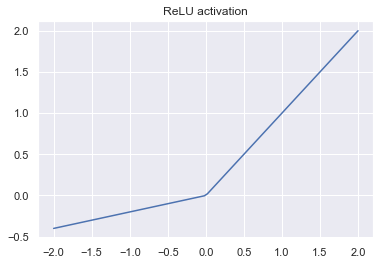

In [7]:
x = torch.tensor(np.linspace(-2, 2, 100))
sns.lineplot(x=x, y=F.leaky_relu(x, negative_slope=0.2))
plt.title("ReLU activation");

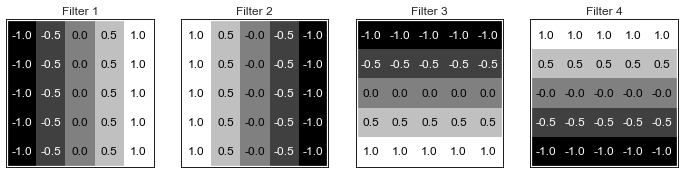

In [8]:
# define the custom filter and three additional filters by by applying transformations to the custom filter
f_c_1 = np.array([[-1, -0.5, 0, 0.5, 1], 
                  [-1, -0.5, 0, 0.5, 1],
                  [-1, -0.5, 0, 0.5, 1],
                  [-1, -0.5, 0, 0.5, 1], 
                  [-1, -0.5, 0, 0.5, 1]])
f_c_2= -f_c_1
f_c_3= f_c_1.T
f_c_4= - f_c_3

# visualize all four filters 
filters = np.array([f_c_1, f_c_2, f_c_3, f_c_4])
u6.visualize_filters(filters)

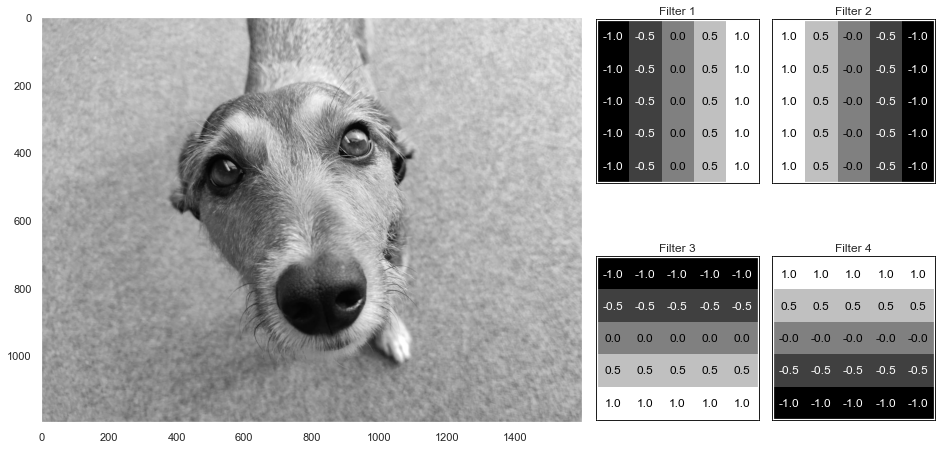

In [9]:
# transform the array of custom filters to a torch tensor
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

# create and initialize an instance of the class InitializedNet
model1= u6.InitializedNet(weight)

# load the charlie image 
img_path = 'resources/charlie_3.jpg'
u6.show_image(img_path, cmap="gray", filters=filters)

# apply the model to the image
gray_img_tensor = u6.get_image_tensor(img_path)

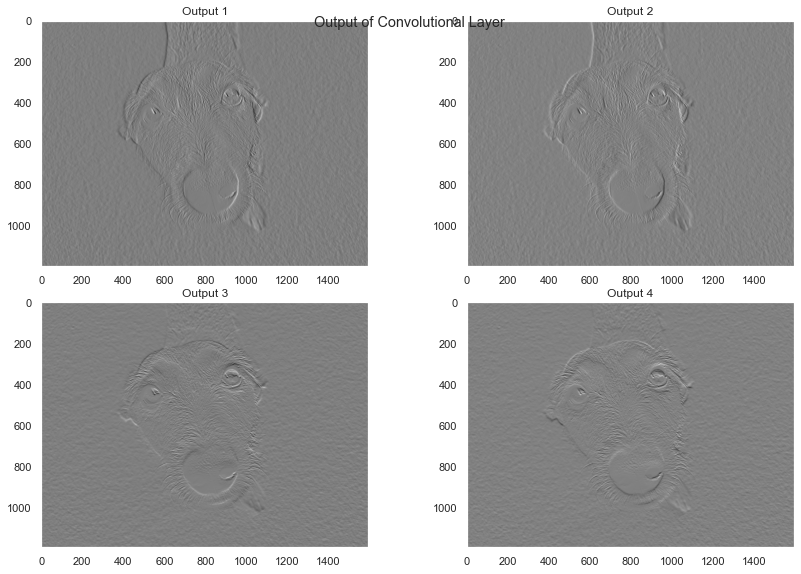

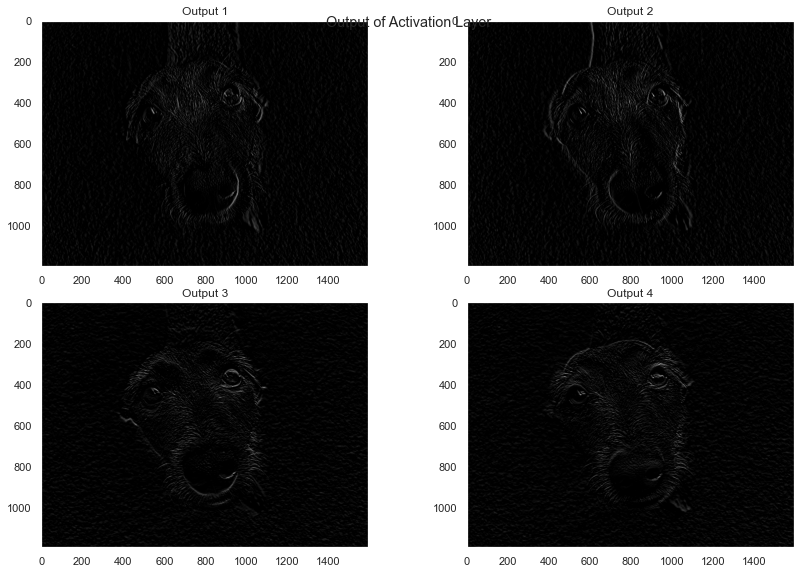

In [10]:
# plot the result of the convolutional layer
conv_layer , _ , _ = model1(gray_img_tensor)
u6.vizualize_cnn_layer(conv_layer, n_filters=4, title="Output of Convolutional Layer")


# plot the result of the activation layer
model2 = u6.InitializedNet(weight, activation=F.relu) 
gray_img_tensor = u6.get_image_tensor(img_path)
conv_layer , activated_layer ,  _  = model2(gray_img_tensor)
u6.vizualize_cnn_layer(activated_layer, n_filters=4, title="Output of Activation Layer")

# Exercise 3
In this exercise we want to compare the output of a max pooling layer with the output of a strided convolution. Perform the following steps: 

- Copy the custom filter from exercise 2 and visualize all <i>four</i> filters.
- Transform the array of <i>custom</i> filters to a <code>torch.Tensor</code> of appropriate shape.
- Create and initialize four neural networks of type <code>InitializedNet</code> using the <i>transformed</i> filters. Define a relu activation function. Additionally, configure the following hyperparameters:
    -  Model 1: <i>max pooling</i> with height/width = $3$, don't define a stride value (will be by default = $1$). 
    -  Model 2: <i>stride</i> = $3$, don't define a max pooling size (will be by default = $1$).
    -  Model 3: <i>max pooling</i> with height/width = $7$, don't define a stride value (will be by default = $1$).
    -  Model 4: <i>stride</i> = $7$, don't define a max pooling size (will be by default = $1$).
- Apply the neural networks to the <i>grayscale</i> version of <i>Charlie</i>. Use <code>get_image_tensor</code> to load Charlie (again, <code>charlie_3.jpg</code>).
- Compare the effect of striding and max pooling by plotting the result of the <i>activation</i> layer of model 2 and 4, and the <i>max pooling</i> layer of model 1 and 3.

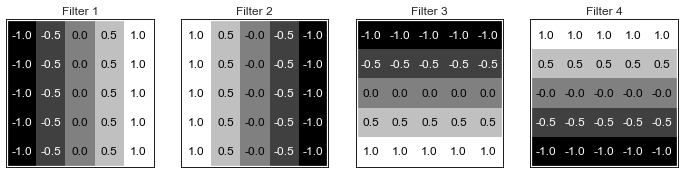

In [11]:
# copy the custom filter here
f_c_1 = np.array([[-1, -0.5, 0, 0.5, 1], 
                  [-1, -0.5, 0, 0.5, 1],
                  [-1, -0.5, 0, 0.5, 1],
                  [-1, -0.5, 0, 0.5, 1], 
                  [-1, -0.5, 0, 0.5, 1]])
f_c_2= -f_c_1
f_c_3= f_c_1.T
f_c_4= - f_c_3

# visualize all four filters 
filters = np.array([f_c_1, f_c_2, f_c_3, f_c_4])
u6.visualize_filters(filters)


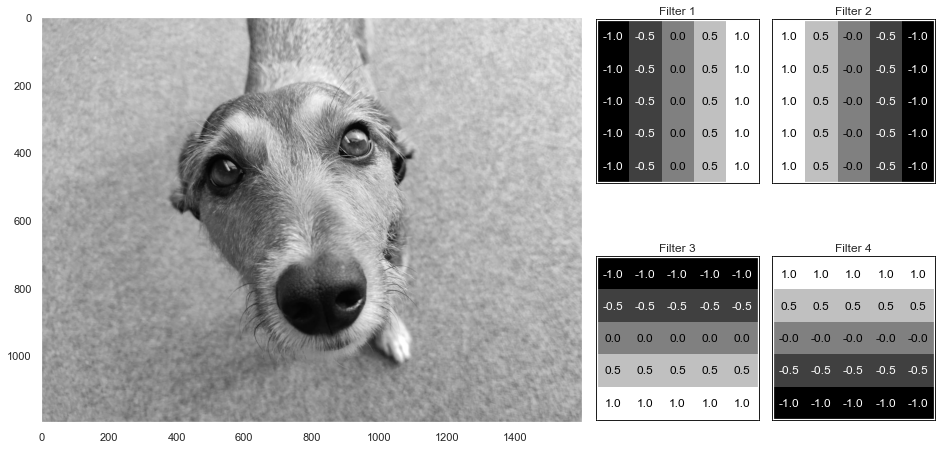

In [12]:
# transform the array of custom filters to a torch tensor
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

# create and initialize 4 instances of the class InitializedNet (model1, model2, model3, model4)
model1 = u6.InitializedNet(weight, length_max_pool=3, width_max_pool=3)
model2 = u6.InitializedNet(weight, filter_stride=3)
model3 = u6.InitializedNet(weight, length_max_pool=7, width_max_pool=7)
model4 = u6.InitializedNet(weight, filter_stride=7)

# load the charlie image 
img_path = 'resources/charlie_3.jpg'
u6.show_image(img_path, cmap="gray", filters=filters)

# apply the 4 models to the image
gray_img_tensor = u6.get_image_tensor(img_path)

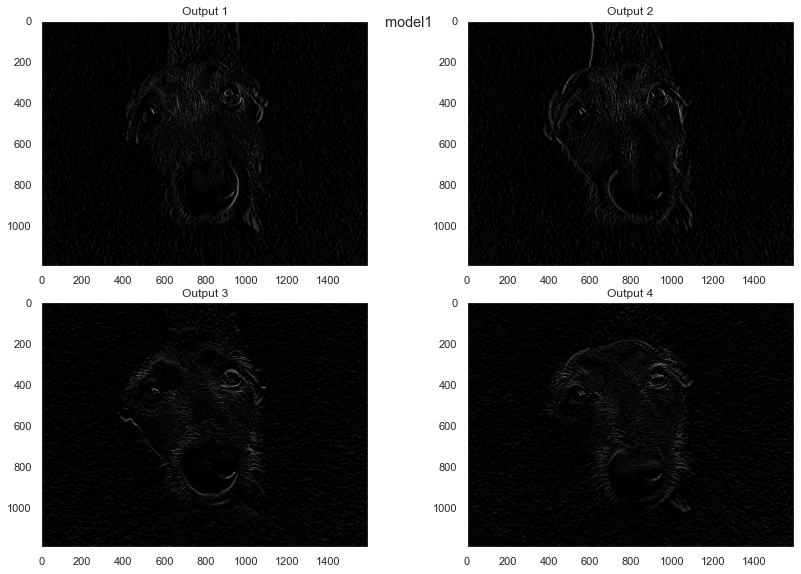

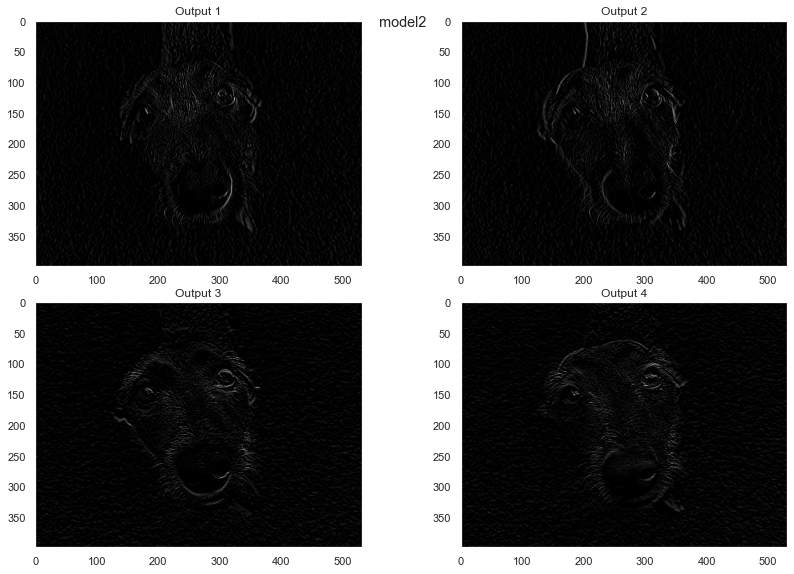

In [13]:
# plot the result of the pooling layer of model 1
conv_layer , activated_layer , pooling_layer = model1(gray_img_tensor)
u6.vizualize_cnn_layer(activated_layer, title="model1")

# plot the result of the activation layer of model 2
conv_layer , activated_layer , pooling_layer = model2(gray_img_tensor)
u6.vizualize_cnn_layer(activated_layer, title="model2")

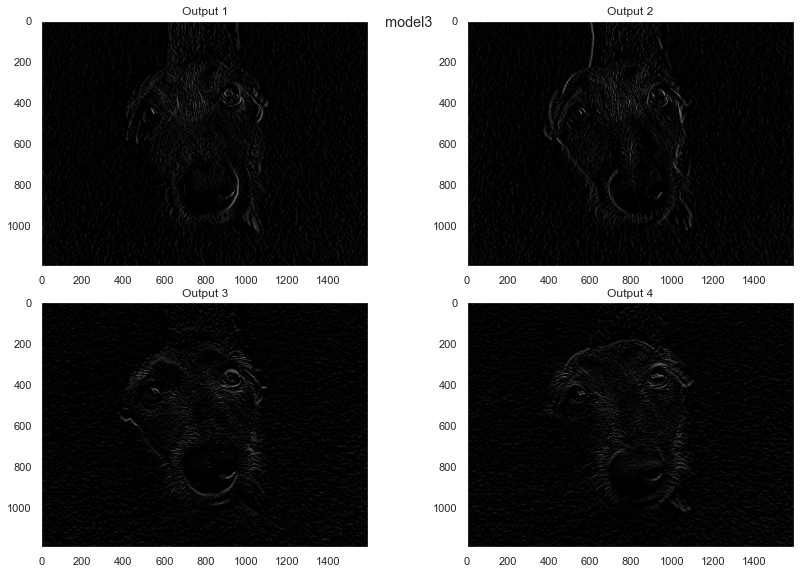

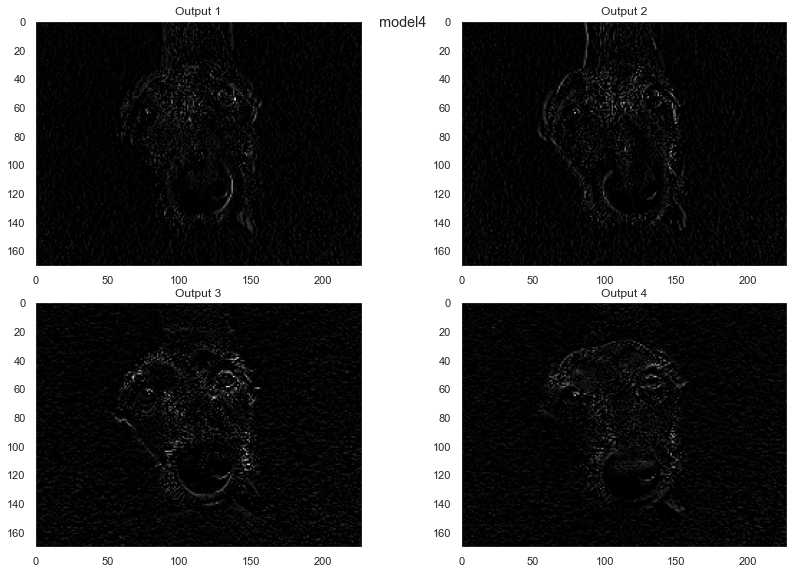

In [14]:
# plot the result of the pooling layer of model 3
conv_layer , activated_layer , pooling_layer = model3(gray_img_tensor)
u6.vizualize_cnn_layer(activated_layer, title="model3")


# plot the result of the activation layer of model 4
conv_layer , activated_layer , pooling_layer = model4(gray_img_tensor)
u6.vizualize_cnn_layer(activated_layer, title="model4")

# Exercise 4

As you are now an expert in defining and applying <i>custom kernels</i>, we will now move on to <i>learn kernels</i> to create more expressive <i>systems</i>. 

Following the instruction given in the lecture notebook, perform the tasks below, but this time, using the <b>CIFAR10</b> dataset. More information about the dataset can be found here: https://www.cs.toronto.edu/~kriz/cifar.html)

To load the CIFAR10 dataset and take a look at a preview of 10 samples run the cell below. The CIFAR10 dataset contains RGB images with a resolution of $32 \times 32$ pixels from $10$ different classes. 

**Note:** The first time you run this, it will download the dataset. You may see a <code>UserWarning: The given NumPy array is not writeable</code>. This can be safely ignored. The download itself might take a couple of minutes

- Reload the dataset considering 15% of the samples as validation set and train the model with the following hyperparameters: batch size = $20$; iterations = $5$; momentum = $0.7$; and learning rate = $0.01$. Use the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code>.

- Create and train a model according the MNIST example provided in the notebook from the lecture. Keep the structure (ordering and number of layers) and hyperparameters if not statet otherwise. Change the model in a way that:
    - it can process the RGB images from the CIFAR10 dataset as input
    - its convolutional layer applies kernels with size $5$ and outputs $16$ feature maps 
    - the number of inputs of the linear layer is adapted correctly after flattening the feature maps
    - its first fully connected layer consists of $256$ neurons

**Note:** For reproducibility, set a fixed seed (seed=42). It will need to be set both before defining the model and before reloading the dataset. Otherwise changes in the model would change the random train/validation split.

- Plot the training and validation losses and print the accuracy on the test set.

- Visualize the filters from the convolutional layer. 

Files already downloaded and verified
Files already downloaded and verified


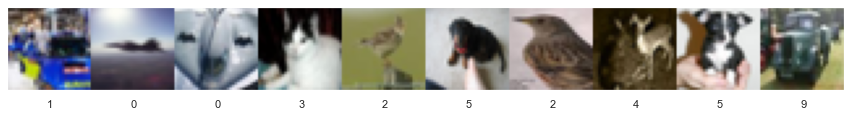

In [15]:
# load the dataset with custom batch size
u6.set_seed(42)
train_loader, valid_loader, test_loader = u6.get_dataset(root='./resources/data',
                                                               variant='CIFAR10',
                                                               batch_size=10,
                                                               valid_size=0.1)
# load the first batch of data
images, labels = next(iter(train_loader))
# transform the image shapes for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=2).transpose(1,2,0)
# transform the normalized image values to values from 0 to 255 
images = ((images - images.min()) * (1/(images.max() - images.min()) * 255)).astype('uint8')
# display the first batch of data
with plt.style.context({r'axes.grid': False, r'xtick.bottom': False}):
    plt.figure(figsize=(15,2))
    _ = plt.imshow(images)
    plt.xticks(16 + np.arange(len(labels)) * 32, labels.numpy())
    plt.yticks([])

In [16]:
# set seed for reproducibility
u6.set_seed(seed=42)

# define the model
model = torch.nn.Sequential(
    # Size changes from (1, 32, 32) to (16, 28, 28)
    torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),  # our conv layer
    torch.nn.ReLU(),                                                 # our nonlinearity
    # Size changes from (16, 28, 28) to (16, 28, 28)
    torch.nn.MaxPool2d(kernel_size=(4,4)),                           # our max pooling layer
    # Size changes from (16, 28, 28) to (16*7*7)
    torch.nn.Flatten(),                                              # flatten activation maps
    torch.nn.Linear(16*7*7, 256),                                    # our first fully connected layer
    torch.nn.ReLU(),                                                 # our nonlinearity
    torch.nn.Linear(256, 16)                                         # our output layer
)



#it can process the RGB images from the CIFAR10 dataset as input
#its convolutional layer applies kernels with size  5  and outputs  16  feature maps
#the number of inputs of the linear layer is adapted correctly after flattening the feature maps
#its first fully connected layer consists of  256  neurons

In [17]:
# re-load the dataset with custom batch size and 15% of examples as a validation set
# load the dataset with custom batch size
u6.set_seed(42)
train_loader, valid_loader, test_loader = u6.get_dataset(root='./resources/data',
                                                               variant='CIFAR10',
                                                               batch_size=15,
                                                               valid_size=0.15)

# define the loss function
loss = torch.nn.functional.cross_entropy

# minimize the given loss for the given model
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=5,        # number of iterations over the training set
    learning_rate=0.01,  # step size / learning rate
    momentum=0.7,        # momentum
    use_cuda_if_available=True
)

Files already downloaded and verified
Files already downloaded and verified


C:\Users\saran\anaconda3\envs\hands-on-ai\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch 1 finished with training loss: 1.50945
Epoch 2 finished with training loss: 1.15657
Epoch 3 finished with training loss: 0.999433
Epoch 4 finished with training loss: 0.886492
Epoch 5 finished with training loss: 0.795508



Training set:
{'loss': 0.6609811090884616, 'accuracy': 0.769466021444567}
Test set:
{'loss': 1.0375747040606689, 'accuracy': 0.6616691826344251}


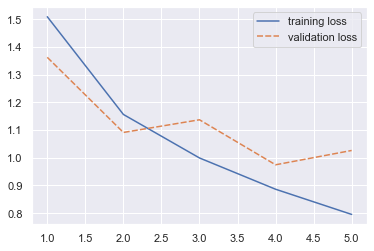

In [18]:
# plot the training and validation losses
sns.lineplot(data=losses);

# print out the accuracy on the test set
print('Training set:')
print(u6.evaluate_model(model, train_loader, loss=loss, accuracy=u6.multiclass_accuracy))
print('Test set:')
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))

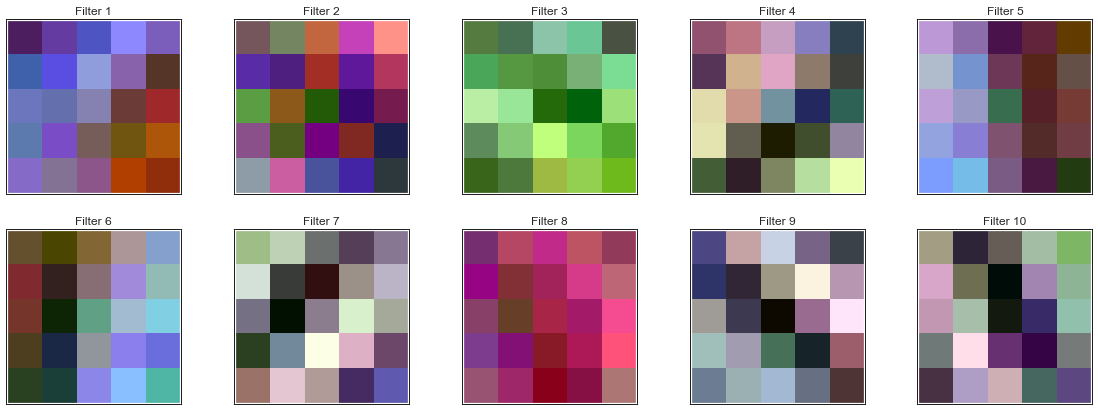

In [19]:
# visualize the filters from the convolutional layer
u6.visualize_cnn_filters(model[0].weight.detach().cpu())

<div class="alert alert-warning">
    What kind of different structures (or textures) in an image might your CNN detect with these filters? 
</div>

There are no significant structures, but it sampled color variation from some parts. 

# Exercise 5

- Load the CIFAR10 dataset considering 15% of the samples as validation set.
- Create a model similar to the model from exercise 4. Your model should contain at least <i>3 convolutional layers</i> (don't forget the non-linearities), the remaining architecture design is up to you.
- Train the model by using the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code> and choose some appropriate hyperparameters.

**Note:** For reproducibility, set a fixed seed (seed=42). It will need to be set both before defining the model and before reloading the dataset. Otherwise changes in the model would change the random train/validation split.

- Can you optimize the model, in order to achieve an accuracy on the test set > 70%? Plot the training and validation losses to show that your model does not overfit to the training data and print out the accuracy on test to show that it is better than 70%.

**Note:** For optimization, you can vary several hyperparameters e.g.: batch size, iterations, learning rate, momentum, number of layers, number of kernels/neurons, and type of nonlinearity. Also different types of layers are allowed, e.g. <code>torch.nn.Dropout()</code>. You may also try randomly flipping training images to perform data augmentation (provided by <code>get_dataset()</code>). Do not vary the validation set size, as that would change the training set size.

In [20]:
# load the dataset with custom batch size and 15% of examples as a validation set
train_loader, valid_loader, test_loader = u6.get_dataset(root='./resources/data',
                                                               variant='CIFAR10',
                                                               batch_size=15,
                                                               valid_size=0.15)


Files already downloaded and verified
Files already downloaded and verified


In [26]:
# set seed for reproducibility
u6.set_seed(42)

# define the model
model = torch.nn.Sequential(
    # Size changes from (1, 32, 32) to (16, 28, 28)
    torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=4, padding=1),  # our conv layer
    torch.nn.ReLU(),                                                 # our nonlinearity
    # Size changes from (16, 28, 28) to (16, 28, 28)
    torch.nn.MaxPool2d(kernel_size=(4,4)),                           # our max pooling layer
    # Size changes from (16, 28, 28) to (16*7*7)
    torch.nn.Flatten(),                                              # flatten activation maps
    torch.nn.Linear(16*7*7, 256),                                    # our first fully connected layer
    torch.nn.ReLU(), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(256, 16)                                         # our output layer
)

# define the loss function
loss = torch.nn.functional.cross_entropy

# minimize the given loss for the given model
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=10,        # number of iterations over the training set
    learning_rate=0.1,  # step size / learning rate
    momentum=0.7,        # momentum
    use_cuda_if_available=True
)

Epoch 1 finished with training loss: 1.73119
Epoch 2 finished with training loss: 1.37378
Epoch 3 finished with training loss: 1.23566
Epoch 4 finished with training loss: 1.1492
Epoch 5 finished with training loss: 1.08742
Epoch 6 finished with training loss: 1.02868
Epoch 7 finished with training loss: 0.987447
Epoch 8 finished with training loss: 0.952519
Epoch 9 finished with training loss: 0.923796
Epoch 10 finished with training loss: 0.889977



Training set:
{'loss': 0.42221068725549865, 'accuracy': 0.8513996795229956}
Test set:
{'loss': 1.4661605624199987, 'accuracy': 0.6294352993972298}


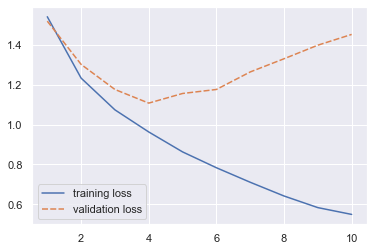

In [25]:
# plot the training and validation losses
sns.lineplot(data=losses);

# print out the accuracy on the test set
print('Training set:')
print(u6.evaluate_model(model, train_loader, loss=loss, accuracy=u6.multiclass_accuracy))
print('Test set:')
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))